In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from IPython import display
from scipy.signal import savgol_filter
import pandas as pd
df = pd.read_csv('./resources/task1data.csv') 
df.head()

,X1,X2,Y
0,2,4,1
1,64,25,0
2,35,70,1
3,1,47,1
4,39,5,0


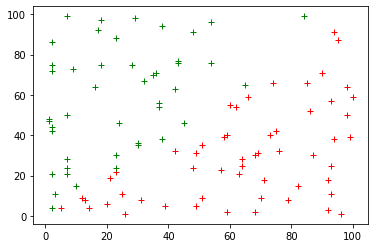

In [2]:
X1 = df["X1"].values.tolist()
X2 = df["X2"].values.tolist()
Y = df["Y"].values.tolist()

for i in range(len(Y)):
    if Y[i] == 0:
        plt.plot(X1[i], X2[i], "r+")
    else:
        plt.plot(X1[i], X2[i], "g+")

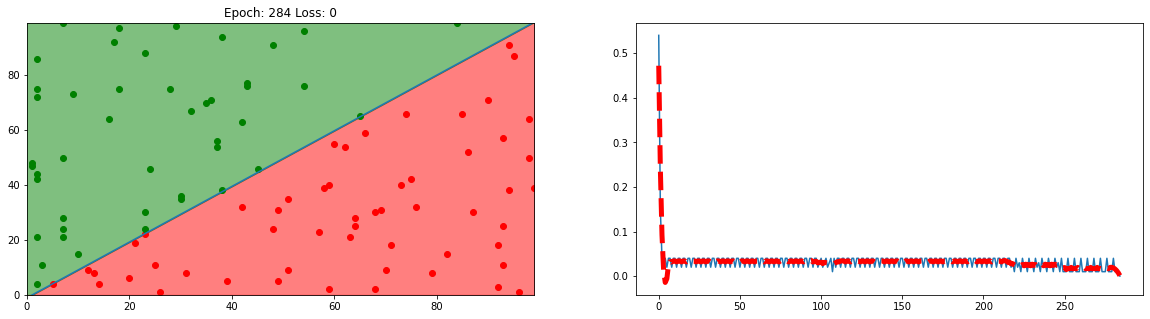

In [6]:
weights = [random.random(), random.random()]
bias = random.random()
lr = 0.0001
theta= 0.5
epoch = 0
count = 0
loss = []
while count < len(X1):
    total_error = 0
    for i in range(len(X1)):
        weighted_sum = weights[0]*X1[i] + weights[1]*X2[i] + bias
        pred = 0
        if weighted_sum > theta:
            pred = 1
        error = Y[i]-pred
        if error != 0:
            count =0
            total_error += math.sqrt(error**2)
            weights[0] = weights[0] + error*X1[i]*lr 
            weights[1] = weights[1] + error*X2[i]*lr 
            bias = bias + error*lr
        else:
            count += 1   
    loss.append(1/len(X1)*total_error)
    plt.figure(figsize=(20,5))
    display.clear_output(wait=True)
    plt.subplot(1,2,1)
    for i in range(len(Y)):
        if Y[i] == 0:
            plt.plot(X1[i], X2[i], "ro")
        else:
            plt.plot(X1[i], X2[i], "go")
    plt.xlim([0, 99])
    plt.ylim([0, 99])
    xintr=(theta-bias)/weights[0]
    yintr=(theta-bias)/weights[1]
    slope=-yintr/xintr
    xx=plt.xlim()
    yeq = []
    for x in xx:
        yeq.append(slope*x+yintr)
    plt.plot(xx,yeq)
    plt.fill_between(xx, yeq, plt.xlim()[0], color='r', alpha= 0.5)
    plt.fill_between(xx, yeq, plt.ylim()[1], color='g', alpha= 0.5)
    plt.title(f"Epoch: {epoch} Loss: {total_error}")
    plt.subplot(1,2,2)
    plt.plot(loss)
    if epoch > 10:
        avg = savgol_filter(loss, 11, 3)
        plt.plot(avg, 'r--', lw=5)
    plt.show()
    epoch += 1